#  Investment Analysis Assignment

### Adding the required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### Reading the files

In [2]:
companies =pd.read_csv('companies.txt',sep='\t',encoding='ISO-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
Sector=pd.read_csv('mapping.csv')

### Data Cleaning

#### Null Handing

In [3]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [4]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [5]:
companies['country_code'].fillna('unknown',inplace=True)
companies['category_list'].fillna('unknown',inplace=True)
rounds2['raised_amount_usd'].fillna(0,inplace=True)
rounds2['funding_round_code'].fillna('unknown',inplace=True)
Sector['category_list'].fillna('unknown',inplace=True)

#### Date object to DateTime

In [6]:
rounds2['funded_at']=pd.to_datetime(rounds2['funded_at'],format='%d-%m-%Y')

#### Convert ID columns to lowercase

In [7]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
companies['permalink']=companies['permalink'].str.lower()
companies['category_list']=companies['category_list'].str.lower()
Sector['category_list']=Sector['category_list'].str.lower()

In [8]:
companies['primary_sector']=companies['category_list'].str.split("|",expand=True)[0]

In [9]:
Sector['category_list']=Sector['category_list'].str.replace('0','na')

#### Outliers Identification

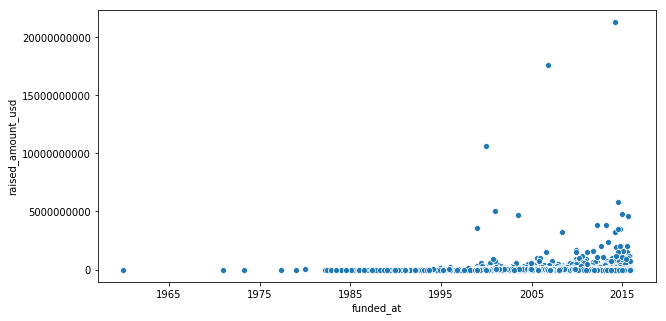

In [11]:
plt.figure(figsize=[10,5])
sns.scatterplot('funded_at','raised_amount_usd',data=rounds2)
plt.ticklabel_format(style='plain', axis='y')

### How many unique companies are present in rounds2?

In [184]:
rounds2[['company_permalink']].describe()

,company_permalink
count,114949
unique,66370
top,/organization/solarflare
freq,19


### How many unique companies are present in the companies file?

In [185]:
companies[['permalink']].describe()

,permalink
count,66368
unique,66368
top,/organization/3gear-systems
freq,1


In [186]:
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

In [187]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 17 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          114949 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              114942 non-null object
status                     114942 non-null object
country_code               114942 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
primary_sector             114942 non-null object
dtypes: float64(1), object(16)
memory u

In [188]:
master_frame.iloc[0]

company_permalink                                      /organization/-fame
funding_round_permalink    /funding-round/9a01d05418af9f794eebff7ace91f638
funding_round_type                                                 venture
funding_round_code                                                       B
funded_at                                                       05-01-2015
raised_amount_usd                                            10,000,000.00
permalink                                              /organization/-fame
name                                                                 #fame
homepage_url                                            http://livfame.com
category_list                                                        media
status                                                           operating
country_code                                                           IND
state_code                                                              16
region                   

In [189]:
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

### Funding Type Analysis

In [190]:
Funding_Type_Analysis = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [191]:
avg_funding=round(Funding_Type_Analysis[['funding_round_type','raised_amount_usd']].groupby('funding_round_type',as_index=False).mean())

In [192]:
avg_funding.head()

,funding_round_type,raised_amount_usd
0,angel,"764,564.00"
1,private_equity,"62,111,788.00"
2,seed,"556,607.00"
3,venture,"10,634,054.00"


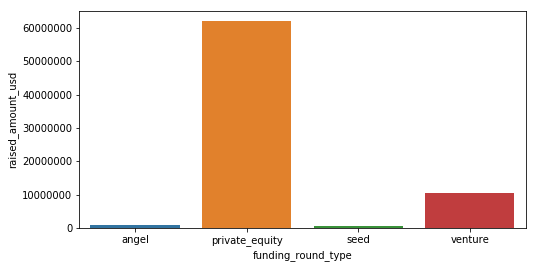

In [204]:
plt.figure(figsize=[8,4])
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=avg_funding)
plt.ticklabel_format(style='plain', axis='y')

### Country Analysis

#### Venture is the choosen investment type

In [205]:
venture_master_frame = master_frame[master_frame['funding_round_type']=='venture']

In [206]:
countries=venture_master_frame[['country_code','raised_amount_usd']].groupby('country_code',as_index=False).sum().sort_values(by='raised_amount_usd', ascending=False)

In [207]:
Top_English_Speaking_countries = ['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','BMU']

In [208]:
Top9=countries[countries['country_code'].isin(Top_English_Speaking_countries)].head(9)

In [209]:
Top9.head(10)

,country_code,raised_amount_usd
100,USA,"422,510,842,796.00"
31,GBR,"20,245,627,416.00"
41,IND,"14,391,858,718.00"
13,CAN,"9,583,332,317.00"
87,SGP,"2,793,917,856.00"
42,IRL,"1,676,131,350.00"
3,AUS,"1,322,934,948.00"
73,NZL,"448,316,383.00"
10,BMU,"288,800,000.00"


#### Top 3 English speaking countries USA, GBR and IND

In [210]:
Sector.set_index('category_list',inplace=True)

In [211]:
Sector_unstack=pd.DataFrame(Sector.unstack())

In [212]:
Sector_unstack=Sector_unstack.reset_index()

In [213]:
Sector_unstack=Sector_unstack[Sector_unstack[0]==1]

In [214]:
Sector_unstack.rename(columns={'level_0':'main_sector','category_list':'primary_sector'},inplace=True)

In [215]:
Sector_unstack=Sector_unstack[['main_sector','primary_sector']]

In [216]:
Sector_unstack.head()

,main_sector,primary_sector
8,Automotive & Sports,adventure travel
14,Automotive & Sports,aerospace
45,Automotive & Sports,auto
46,Automotive & Sports,automated kiosk
47,Automotive & Sports,automotive


In [217]:
venture_master_frame=pd.merge(venture_master_frame,Sector_unstack,how='left',on='primary_sector')

In [218]:
D1=venture_master_frame[venture_master_frame['country_code']=='USA']
D2=venture_master_frame[venture_master_frame['country_code']=='GBR']
D3=venture_master_frame[venture_master_frame['country_code']=='IND']

### D1

#### Total number of Investments (count)

In [219]:
D1['company_permalink'].count()

38372

#### Total amount of investment (USD)

In [220]:
D1['raised_amount_usd'].sum()

422510842796.0

#### Top Sectors name (no. of investment-wise)?

In [221]:
D1.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']]

,main_sector,company_permalink
7,Others,8763
2,Cleantech / Semiconductors,8268
8,"Social, Finance, Analytics, Advertising",7822
6,"News, Search and Messaging",4618
4,Health,3413
5,Manufacturing,2643
3,Entertainment,1927
0,Automotive & Sports,566
1,Blanks,338


#### For point 3 (top sector count-wise), which company received the highest investment?

In [222]:
D1[D1['main_sector']=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
SoFi,"1,365,199,900.00"
Snapchat,"1,165,100,000.00"
LivingSocial,"818,225,039.00"
Facebook,"615,200,000.00"
Zenefits,"581,500,000.00"


#### For point 4 (second best sector count-wise), which company received the highest investment?

In [223]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
Freescale Semiconductor,"17,600,000,000.00"
Juno Therapeutics,"1,159,803,496.00"
Better Place,"775,000,000.00"
BrightSource Energy,"582,000,000.00"
GreatPoint Energy,"562,000,000.00"


### D2

In [224]:
D2['company_permalink'].count()

2303

In [225]:
D2['raised_amount_usd'].sum()

20245627416.0

In [226]:
D2.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']]

,main_sector,company_permalink
7,Others,580
8,"Social, Finance, Analytics, Advertising",481
2,Cleantech / Semiconductors,466
6,"News, Search and Messaging",265
3,Entertainment,160
5,Manufacturing,132
4,Health,126
0,Automotive & Sports,54
1,Blanks,38


In [227]:
D2[D2['main_sector']=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
OneWeb,"500,000,000.00"
Farfetch,"194,500,000.00"
Liquid Telecom,"150,000,000.00"
picoChip,"111,500,000.00"
NewVoiceMedia,"111,300,000.00"


In [228]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
Powa Technologies,"176,700,000.00"
Borro,"171,572,758.00"
WorldRemit,"147,109,000.00"
Wonga,"145,393,366.00"
Mereo,"119,000,000.00"


### D3

In [229]:
D3['company_permalink'].count()

992

In [230]:
D3['raised_amount_usd'].sum()

14391858718.0

In [231]:
D3.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']]

,main_sector,company_permalink
7,Others,332
8,"Social, Finance, Analytics, Advertising",193
6,"News, Search and Messaging",154
3,Entertainment,90
5,Manufacturing,64
2,Cleantech / Semiconductors,63
4,Health,56
0,Automotive & Sports,32
1,Blanks,8


In [232]:
D3[D3['main_sector']=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
Flipkart,"2,451,000,000.00"
Snapdeal,"310,699,998.00"
Tata Teleservices,"212,000,000.00"
Myntra,"158,750,000.00"
Pepperfry.com,"128,000,000.00"


In [161]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).head()

,raised_amount_usd
name,
ShopClues.com,"129,000,000.00"
LYCOS Internet Limited,"103,000,000.00"
yepme.com,"88,200,000.00"
BankBazaar.com,"79,000,000.00"
PolicyBazaar,"69,600,000.00"


### Plots

#### 1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [233]:
Funding_Type_Analysis = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [234]:
total_funding=round(Funding_Type_Analysis[['funding_round_type','raised_amount_usd']].groupby('funding_round_type',as_index=False).sum().sort_values(by='raised_amount_usd',ascending=False))

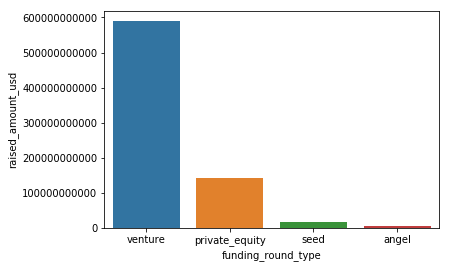

In [236]:
sns.barplot(x='funding_round_type',y='raised_amount_usd', data=total_funding)
plt.ticklabel_format(style='plain', axis='y')

In [237]:
avg_funding=round(master_frame[['funding_round_type','raised_amount_usd']].groupby('funding_round_type',as_index=False).mean().sort_values(by='raised_amount_usd',ascending=False))

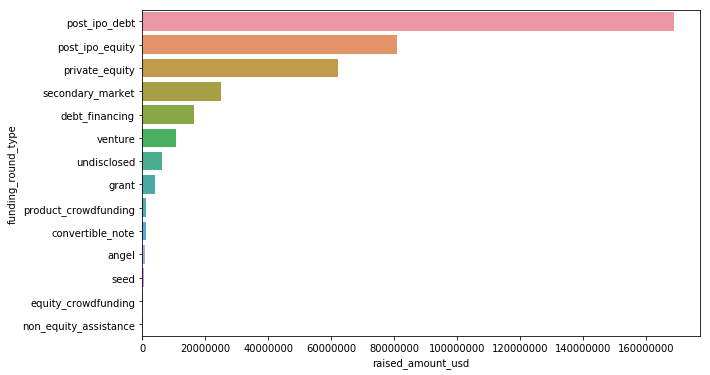

In [240]:
plt.figure(figsize=[10,6])
sns.barplot(x='raised_amount_usd',y='funding_round_type', data=avg_funding)
plt.ticklabel_format(style='plain', axis='x')

#### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [241]:
English_Speaking_countries = ['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','BMU']

In [242]:
venture_master_frame_es=venture_master_frame[venture_master_frame['country_code'].isin(English_Speaking_countries)]

In [243]:
venture_master_frame_es = venture_master_frame_es[['country_code','raised_amount_usd']].groupby('country_code',as_index=False).sum().sort_values(by='raised_amount_usd', ascending=False)

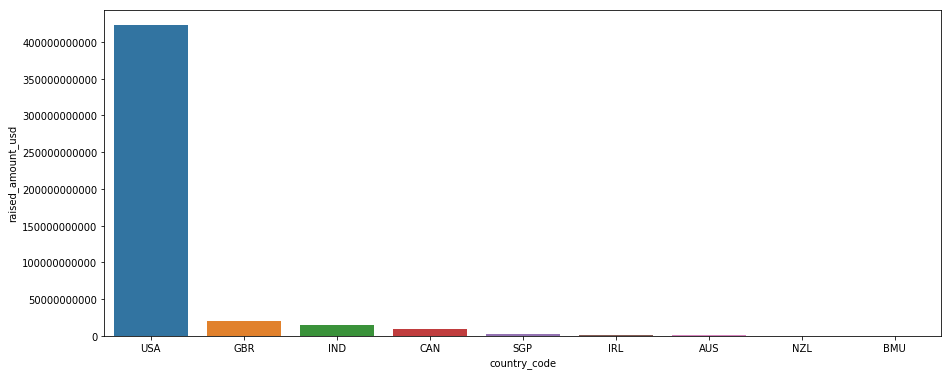

In [245]:
plt.figure(figsize=[15,6])
sns.barplot(x='country_code',y='raised_amount_usd',data=venture_master_frame_es)
plt.ticklabel_format(style='plain', axis='y')

#### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [246]:
D1_US = D1.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']].head(3)
D1_US.rename(columns={'main_sector':'Sectors','company_permalink':'No of Investments'},inplace=True)

In [247]:
D2_GBR = D2.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']].head(3)
D2_GBR.rename(columns={'main_sector':'Sectors','company_permalink':'No of Investments'},inplace=True)

In [248]:
D3_India = D3.groupby('main_sector',as_index=False).count().sort_values(by='company_permalink',ascending=False)[['main_sector','company_permalink']].head(3)
D3_India.rename(columns={'main_sector':'Sectors','company_permalink':'No of Investments'},inplace=True)

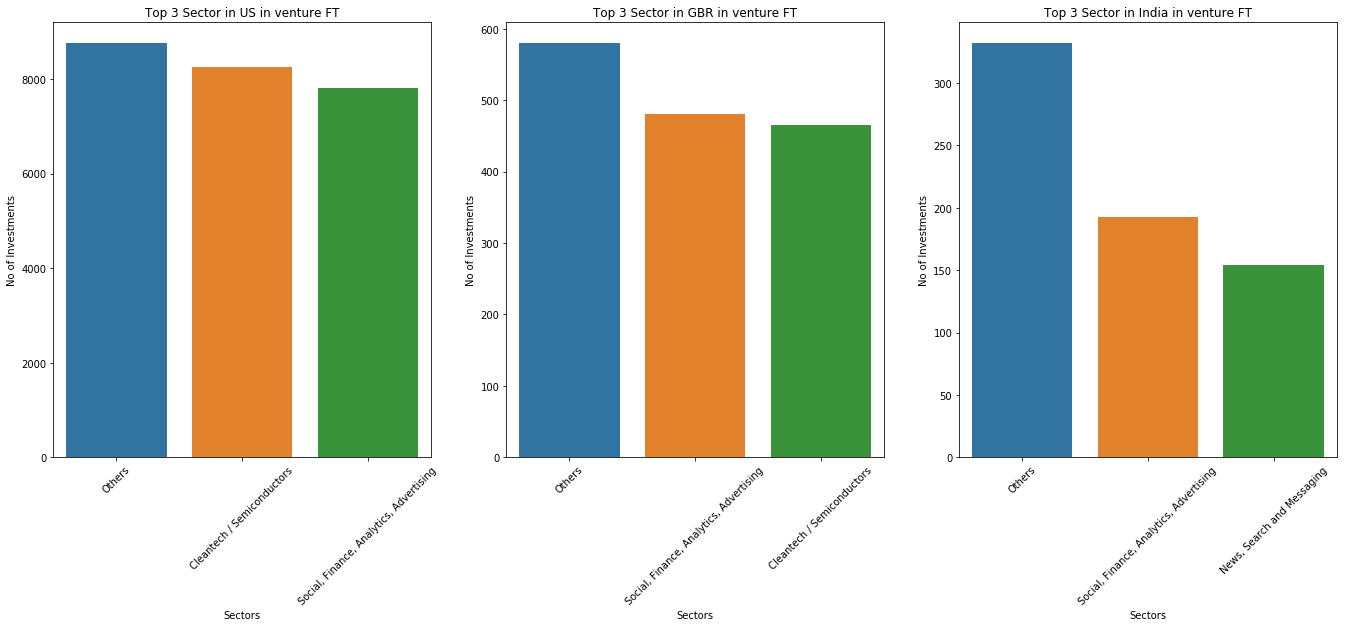

In [249]:
fig, (maxis1, maxis2,maxis3) = plt.subplots(1, 3,figsize=(23,8))
sns.barplot(x='Sectors',y='No of Investments',data=D1_US,ax = maxis1)
maxis1.set_title("Top 3 Sector in US in venture FT")
sns.barplot(x='Sectors',y='No of Investments',data=D2_GBR,ax = maxis2)
maxis2.set_title("Top 3 Sector in GBR in venture FT")
sns.barplot(x='Sectors',y='No of Investments',data=D3_India,ax = maxis3)
maxis3.set_title("Top 3 Sector in India in venture FT")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    